In [ ]:
#for operating system operations like creating a file
import os

import numpy as np # for math and arrays
import pandas as pd # data from data
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting data and creating different charts

#impor NN layers and other components
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,BatchNormalization,Dropout
from keras import optimizers

from sklearn.model_selection import train_test_split

In [ ]:
# to make sure the experiment is reproducible
np.random.seed(1)
tf.random.set_seed(2) 
seed=3

In [ ]:

from google.colab import files
uploaded = files.upload()

dataframe = pd.read_csv("processtraindata1.csv")

Saving processtraindata1.csv to processtraindata1 (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

test_dataset = pd.read_csv("processedtestingdata.csv")

Saving processedtestingdata.csv to processedtestingdata (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

test_lable = pd.read_csv("Original Testing labels.csv")

Saving Original Testing labels.csv to Original Testing labels (1).csv


In [ ]:
test_dataset.shape

(31586, 14)

In [ ]:
#dataframe.shape
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126343 entries, 0 to 126342
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   international_ips       126343 non-null  float64
 1   remote_ip               126343 non-null  float64
 2   tcp_udp_ratio           126343 non-null  float64
 3   ports                   126343 non-null  float64
 4   max_window_size         126343 non-null  float64
 5   tcp_upload_bandwidth    126343 non-null  float64
 6   tcp_download_bandwidth  126343 non-null  float64
 7   udp_payload_length      126343 non-null  float64
 8   tcp_session_0_5         126343 non-null  float64
 9   tcp_session_125_600     126343 non-null  float64
 10  keep_alive_0_35         126343 non-null  float64
 11  udns                    126343 non-null  float64
 12  dns                     126343 non-null  float64
 13  mdns                    126343 non-null  int64  
 14  isiot               

In [ ]:
dataframe= dataframe.sample(frac=1) #randomly shuffle the rows to make sure the data is not sorted

In [ ]:
train_dataset,valid_dataset = train_test_split(dataframe , test_size=0.3) 

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataset), len(valid_dataset))
)


Using 88440 samples for training and 37903 for validation


In [ ]:
train_label = train_dataset.pop('isiot')
valid_label = valid_dataset.pop('isiot')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
international_ips,88440.0,0.000070,0.000463,0.0,0.000000e+00,0.000000,0.000057,0.049938
remote_ip,88440.0,0.000508,0.005696,0.0,5.650000e-05,0.000113,0.000396,0.675806
tcp_udp_ratio,88440.0,0.590373,0.368295,0.0,3.333333e-01,0.500000,1.000000,1.000000
ports,88440.0,0.000292,0.005765,0.0,1.530000e-05,0.000030,0.000076,0.999771
max_window_size,88440.0,0.373149,0.340313,0.0,9.265278e-02,0.222782,0.445563,1.000000
tcp_upload_bandwidth,88440.0,0.000376,0.007812,0.0,3.960000e-07,0.000003,0.000022,1.000000
tcp_download_bandwidth,88440.0,0.000268,0.007025,0.0,3.080000e-07,0.000002,0.000009,1.000000
udp_payload_length,88440.0,0.045839,0.081337,0.0,0.000000e+00,0.028299,0.042318,1.000000
tcp_session_0_5,88440.0,0.000560,0.011892,0.0,0.000000e+00,0.000035,0.000106,1.000000
tcp_session_125_600,88440.0,0.003990,0.013210,0.0,0.000000e+00,0.000000,0.002632,1.000000


In [ ]:
from tensorflow.keras import optimizers

def model_multi_layers():
#Keras model object created from Sequential class. This will act as container
    model= Sequential()

#Input layer with 32 neurons. Input shape explicitly designated
    model.add(Dense(32,input_shape = (train_dataset.shape[1],)))

    model.add(Dense(64, Activation("relu")))
    model.add(Dropout(0.3))

#Output Layer
    model.add(Dense(1, Activation("sigmoid")))

#Activation: sigmoid, softmax, tanh, relu, LeakyRelu
    #learning_rate = 0.05
    #optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

    return model

model2= model_multi_layers()
print('Summary of the model:')
model2.summary()



Summary of the model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                480       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS=60
batch_size=32


with tf.device('/CPU:0'):
  history = model2.fit(train_dataset,train_label, batch_size = batch_size, epochs= EPOCHS, verbose=1, shuffle= True, steps_per_epoch= int(train_dataset.shape[0] / batch_size), validation_data= (valid_dataset, valid_label))


Epoch 1/60
2763/2763 [==============================] - 7s 2ms/step - loss: 0.4255 - accuracy: 0.8128 - val_loss: 0.3428 - val_accuracy: 0.8675
Epoch 2/60
2763/2763 [==============================] - 7s 2ms/step - loss: 0.3306 - accuracy: 0.8750 - val_loss: 0.2844 - val_accuracy: 0.9002
Epoch 3/60
2763/2763 [==============================] - 6s 2ms/step - loss: 0.2703 - accuracy: 0.9036 - val_loss: 0.2264 - val_accuracy: 0.9203
Epoch 4/60
2763/2763 [==============================] - 8s 3ms/step - loss: 0.2192 - accuracy: 0.9344 - val_loss: 0.1897 - val_accuracy: 0.9435
Epoch 5/60
2763/2763 [==============================] - 13s 5ms/step - loss: 0.1966 - accuracy: 0.9416 - val_loss: 0.1751 - val_accuracy: 0.9427
Epoch 6/60
2763/2763 [==============================] - 6s 2ms/step - loss: 0.1874 - accuracy: 0.9436 - val_loss: 0.1729 - val_accuracy: 0.9437
Epoch 7/60
2763/2763 [==============================] - 6s 2ms/step - loss: 0.1795 - accuracy: 0.9457 - val_loss: 0.1829 - val_accuracy

In [ ]:
print('Summary of the results after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch:


,loss,accuracy,val_loss,val_accuracy,epoch
55,0.083855,0.975907,0.067513,0.983827,55
56,0.082680,0.976088,0.083046,0.976176,56
57,0.082895,0.975975,0.070185,0.981585,57
58,0.081644,0.976914,0.063513,0.984408,58
59,0.081992,0.976563,0.064227,0.982534,59


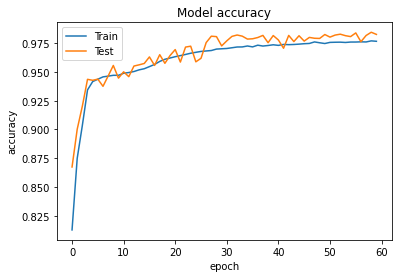

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()


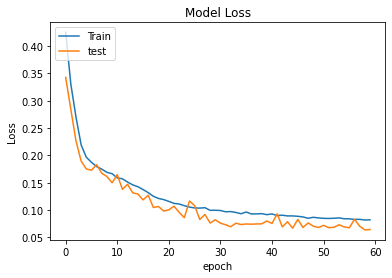

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','test'], loc='upper left')
plt.show()

In [ ]:
print('Train Split: ')
loss, accuracy = model2.evaluate(train_dataset, train_label, verbose=2)

print('Accuracy : {:5.2f}'.format(accuracy))


Train Split: 
2764/2764 - 3s - loss: 0.0585 - accuracy: 0.9837 - 3s/epoch - 934us/step
Accuracy :  0.98


In [ ]:
print('Test Split: ')
loss, accuracy = model2.evaluate(test_dataset, test_lable, verbose=2)

print('Accuracy : {:5.2f}'.format(accuracy))

Test Split: 
988/988 - 1s - loss: 0.0650 - accuracy: 0.9823 - 896ms/epoch - 907us/step
Accuracy :  0.98


In [ ]:
print('Evaluation Split: ')
loss, accuracy = model2.evaluate(valid_dataset, valid_label, verbose=2)

print('Accuracy : {:5.2f}'.format(accuracy))

Evaluation Split: 
1185/1185 - 1s - loss: 0.0642 - accuracy: 0.9825 - 1s/epoch - 935us/step
Accuracy :  0.98


[[15427   293]
 [  265 15601]]


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

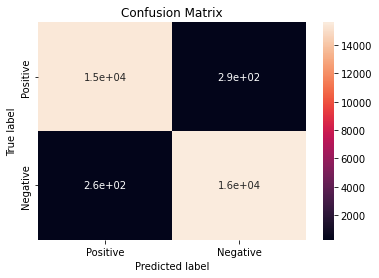

In [ ]:
from sklearn.metrics import confusion_matrix

ax=plt.subplot()
predict_results= model2.predict(test_dataset)
predict= model2.predict(test_dataset)
#confid_score = model2.predict_proba(test_dataset, batch_size=1) #depricated
predict_results = (predict_results > 0.5)
cm= confusion_matrix (test_lable, predict_results)
print(cm)
sns.heatmap(cm , annot=True,ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Positive','Negative'])

In [ ]:
predict[np.where(predict>0.7)]

array([0.99777496, 0.9934336 , 0.9857087 , ..., 0.99534327, 0.99401426,
       0.9999746 ], dtype=float32)

In [ ]:
import sklearn.metrics
precision = sklearn.metrics.precision_score(test_lable, predict_results, pos_label=1)
print(precision)


0.9815653705800931


In [ ]:
recall = sklearn.metrics.recall_score(test_lable, predict_results, pos_label=1)
print(recall)

0.9832976175469558


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("drive/MyDrive/Cyber project/Original Testing Data.csv")

In [ ]:
df.head()

,mac,local_ips,international_ips,remote_ip,tcp_udp_ratio,ports,max_window_size,tcp_bandwidth,tcp_upload_bandwidth,tcp_download_bandwidth,well_known_dst_ports,registered_dst_ports,dynamic_dst_ports,max_static_port_flows,udp_payload_length,tcp_session_0-5,tcp_session_5-35,tcp_session_35-65,tcp_session_65-125,tcp_session_125-600,tcp_session_600+,keep_alive_0-35,keep_alive_35-65,keep_alive_65-95,keep_alive_95-125,keep_alive_125-600,udns,dns,mdns,ssdp,ntp_protocol,ntp_0-65,ntp_65-650,has_tls,has_smb
0,00:16:6c:ab:6b:88,6,4,7,0.812500,16,6072,7525,3136,4389,31,40,0,1,0.000000,3,3,0,0,1,0,0,0,0,0,0,2,9,0,1,0,0,0,NaN,NaN
1,14:cc:20:51:33:ea,28,0,10,0.456790,81,65535,137289,55726,81563,0,2243,201,14,421.013996,17,0,2,0,13,0,1,0,0,0,0,13,40,0,1,0,0,0,NaN,NaN
2,14:cc:20:51:33:ea,23,0,7,0.581818,55,65535,108212,31425,76787,0,938,136,12,55.819672,14,0,1,0,17,0,3,1,0,0,0,12,24,0,0,0,0,0,NaN,NaN
3,08:21:ef:3b:fc:e3,3,7,11,1.000000,4,2876,685,513,172,4,8,0,1,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,02:1a:c5:01:00:00,0,0,2,0.500000,2,14480,1560,888,672,1,16,0,1,40.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.0,0.0


In [ ]:
df["pred_label"]=predict_results
df["confidence_score"]=predict
df["isiot"]=test_lable
df["pred_label"]=df["pred_label"].apply(lambda x:1 if x==True else 0)

In [ ]:
df.head()

,mac,local_ips,international_ips,remote_ip,tcp_udp_ratio,ports,max_window_size,tcp_bandwidth,tcp_upload_bandwidth,tcp_download_bandwidth,well_known_dst_ports,registered_dst_ports,dynamic_dst_ports,max_static_port_flows,udp_payload_length,tcp_session_0-5,tcp_session_5-35,tcp_session_35-65,tcp_session_65-125,tcp_session_125-600,tcp_session_600+,keep_alive_0-35,keep_alive_35-65,keep_alive_65-95,keep_alive_95-125,keep_alive_125-600,udns,dns,mdns,ssdp,ntp_protocol,ntp_0-65,ntp_65-650,has_tls,has_smb,pred_label,confidence_score,isiot
0,00:16:6c:ab:6b:88,6,4,7,0.812500,16,6072,7525,3136,4389,31,40,0,1,0.000000,3,3,0,0,1,0,0,0,0,0,0,2,9,0,1,0,0,0,NaN,NaN,1,0.997775,1
1,14:cc:20:51:33:ea,28,0,10,0.456790,81,65535,137289,55726,81563,0,2243,201,14,421.013996,17,0,2,0,13,0,1,0,0,0,0,13,40,0,1,0,0,0,NaN,NaN,1,0.993434,1
2,14:cc:20:51:33:ea,23,0,7,0.581818,55,65535,108212,31425,76787,0,938,136,12,55.819672,14,0,1,0,17,0,3,1,0,0,0,12,24,0,0,0,0,0,NaN,NaN,1,0.985709,1
3,08:21:ef:3b:fc:e3,3,7,11,1.000000,4,2876,685,513,172,4,8,0,1,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0.997577,1
4,02:1a:c5:01:00:00,0,0,2,0.500000,2,14480,1560,888,672,1,16,0,1,40.000000,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.0,0.0,0,0.031609,0


In [ ]:
df=df[["mac","isiot","pred_label","confidence_score"]]
df.reset_index(drop=False,inplace=True)


In [ ]:
df

,index,mac,isiot,pred_label,confidence_score
0,0,00:16:6c:ab:6b:88,1,1,0.997775
1,1,14:cc:20:51:33:ea,1,1,0.993434
2,2,14:cc:20:51:33:ea,1,1,0.985709
3,3,08:21:ef:3b:fc:e3,1,1,0.997577
4,4,02:1a:c5:01:00:00,0,0,0.031609
...,...,...,...,...,...
31581,31581,d0:73:d5:01:83:08,1,1,0.999975
31582,31582,00:19:55:4b:68:a1,0,0,0.002663
31583,31583,00:19:55:4b:68:a1,0,0,0.000620
31584,31584,00:19:55:4b:68:a1,0,0,0.000296


In [ ]:
newdf=pd.DataFrame()
for i in df["mac"].unique():
  temp=df.loc[df['mac']==i].copy()
  indexes=[]
  scores=[]
  pred=[]
  tempdf=pd.DataFrame()
  for j in range(0,temp.shape[0],3):
    # print(j)
    # print(list(temp['confidence_score'])[j:j+3])
    scores=scores+[list(temp['confidence_score'])[j:j+3]]
    indexes=indexes+[list(temp['index'])[j:j+3]]
    pred=pred+[list(temp['pred_label'])[j:j+3]]
  tempdf['mac']=[i]*len(scores)
  # print(len(scores))
  tempdf['confidence_scores']=scores
  # print(tempdf)
  # break
  tempdf['indexes']=indexes
  tempdf['pred_label_list']=pred
  newdf=newdf.append(tempdf)
print(newdf.head())
newdf.to_csv("drive/MyDrive/Cyber project/some_output.csv")
    # break

                 mac  ... pred_label_list
0  00:16:6c:ab:6b:88  ...       [1, 1, 1]
1  00:16:6c:ab:6b:88  ...       [1, 1, 1]
2  00:16:6c:ab:6b:88  ...       [1, 1, 1]
3  00:16:6c:ab:6b:88  ...       [1, 1, 1]
4  00:16:6c:ab:6b:88  ...       [1, 1, 1]

[5 rows x 4 columns]


In [ ]:
newdf['consensus']=newdf['pred_label_list'].apply(lambda x:True if sum(x)==3 or sum(x)==0 else False)
newdf['major_pred_label']=newdf['pred_label_list'].apply(lambda x:1 if sum(x)>=2 else 0)

In [ ]:
newdf

,mac,confidence_scores,indexes,pred_label_list,consensus,major_pred_label
0,00:16:6c:ab:6b:88,"[0.9977749586105347, 0.9982755780220032, 0.998...","[0, 8, 11]","[1, 1, 1]",True,1
1,00:16:6c:ab:6b:88,"[0.998367428779602, 0.9997156858444214, 0.9982...","[12, 19, 46]","[1, 1, 1]",True,1
2,00:16:6c:ab:6b:88,"[0.9975342154502869, 0.996432900428772, 0.9966...","[59, 186, 225]","[1, 1, 1]",True,1
3,00:16:6c:ab:6b:88,"[0.9989361763000488, 0.9996232986450195, 0.995...","[321, 455, 466]","[1, 1, 1]",True,1
4,00:16:6c:ab:6b:88,"[0.9975342154502869, 0.9988048076629639, 0.996...","[485, 545, 563]","[1, 1, 1]",True,1
...,...,...,...,...,...,...
0,d4:ae:52:c6:1d:1d,[0.015496671199798584],[29599],[0],True,0
0,00:0c:29:a7:63:f7,[6.113310973887565e-06],[29650],[0],True,0
0,00:50:56:b4:03:06,[7.25171594240237e-06],[29887],[0],True,0
0,00:0c:29:25:3a:70,[6.098822723288322e-06],[30225],[0],True,0
